# Exploratory data analysis (EDA)
For the EDA we will explore the following ; 
1. Data Structure & Missing values 
2. Data summary 
3. Feature distribution - Categorical Insights - Trends
4. Correlation

## Importing Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

## Loading data

In [4]:
train = pd.read_csv("GiveMeSomeCredit/cs-training.csv")
test = pd.read_csv("GiveMeSomeCredit/cs-test.csv")
data_excel = pd.read_excel("GiveMeSomeCredit/Data Dictionary.xls")
sample_data = pd.read_csv("GiveMeSomeCredit/sampleEntry.csv")

In [5]:
train_df = train.copy()
test_df = test.copy()

## 1. Data structure & Missing values

In [6]:
print("====== SUMMARY =======")
print()
print(f"Training set size: {train_df.shape}")
print(f"Testing set size:  {test_df.shape}")
print()
print(f"All features in the training dataset: {', '.join(map(str, train_df.columns))}")
print(f"All features in the testing dataset: {', '.join(map(str, test_df.columns))}")
print()
print("---Training set survivability---")
print(f"Number of Applicants: {train_df.shape[0]}")
print(f"Number of Applicants with financial distress = {len(train_df[train_df['SeriousDlqin2yrs'] == 1])}")
print(f"Percentage of Applicants with financial distress = {len(train_df[train_df['SeriousDlqin2yrs'] == 1]) / train_df.shape[0] * 100} %")
print()
print("---Missing data [%]---")
print(train_df.isnull().sum()[train_df.isnull().sum() > 0])
print()
print("---Data types---")
print(train_df.info())
print()

====== SUMMARY =======

Training set size: (150000, 12)
Testing set size:  (101503, 12)

All features in the training dataset: Unnamed: 0, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents
All features in the testing dataset: Unnamed: 0, SeriousDlqin2yrs, RevolvingUtilizationOfUnsecuredLines, age, NumberOfTime30-59DaysPastDueNotWorse, DebtRatio, MonthlyIncome, NumberOfOpenCreditLinesAndLoans, NumberOfTimes90DaysLate, NumberRealEstateLoansOrLines, NumberOfTime60-89DaysPastDueNotWorse, NumberOfDependents

---Training set survivability---
Number of Applicants: 150000
Number of Applicants with financial distress = 10026
Percentage of Applicants with financial distress = 6.683999999999999 %

---Missing data [%]---
MonthlyIncome         29731
NumberOfDependents     3924
dtype

## 2.Data Summary

In [7]:
print("====== Data Summary =======")
round(train_df.describe(),2)

====== Data Summary =======


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.00,150000.00,150000.00,150000.00,150000.00,150000.00,120269.00,150000.00,150000.00,150000.00,150000.00,146076.00
mean,75000.50,0.07,6.05,52.30,0.42,353.01,6670.22,8.45,0.27,1.02,0.24,0.76
std,43301.41,0.25,249.76,14.77,4.19,2037.82,14384.67,5.15,4.17,1.13,4.16,1.12
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37500.75,0.00,0.03,41.00,0.00,0.18,3400.00,5.00,0.00,0.00,0.00,0.00
50%,75000.50,0.00,0.15,52.00,0.00,0.37,5400.00,8.00,0.00,1.00,0.00,0.00
75%,112500.25,0.00,0.56,63.00,0.00,0.87,8249.00,11.00,0.00,2.00,0.00,1.00
max,150000.00,1.00,50708.00,109.00,98.00,329664.00,3008750.00,58.00,98.00,54.00,98.00,20.00


## 3. Feature distribution - Categorical Insights - Trends

In [8]:
plt.style.use("seaborn-v0_8")

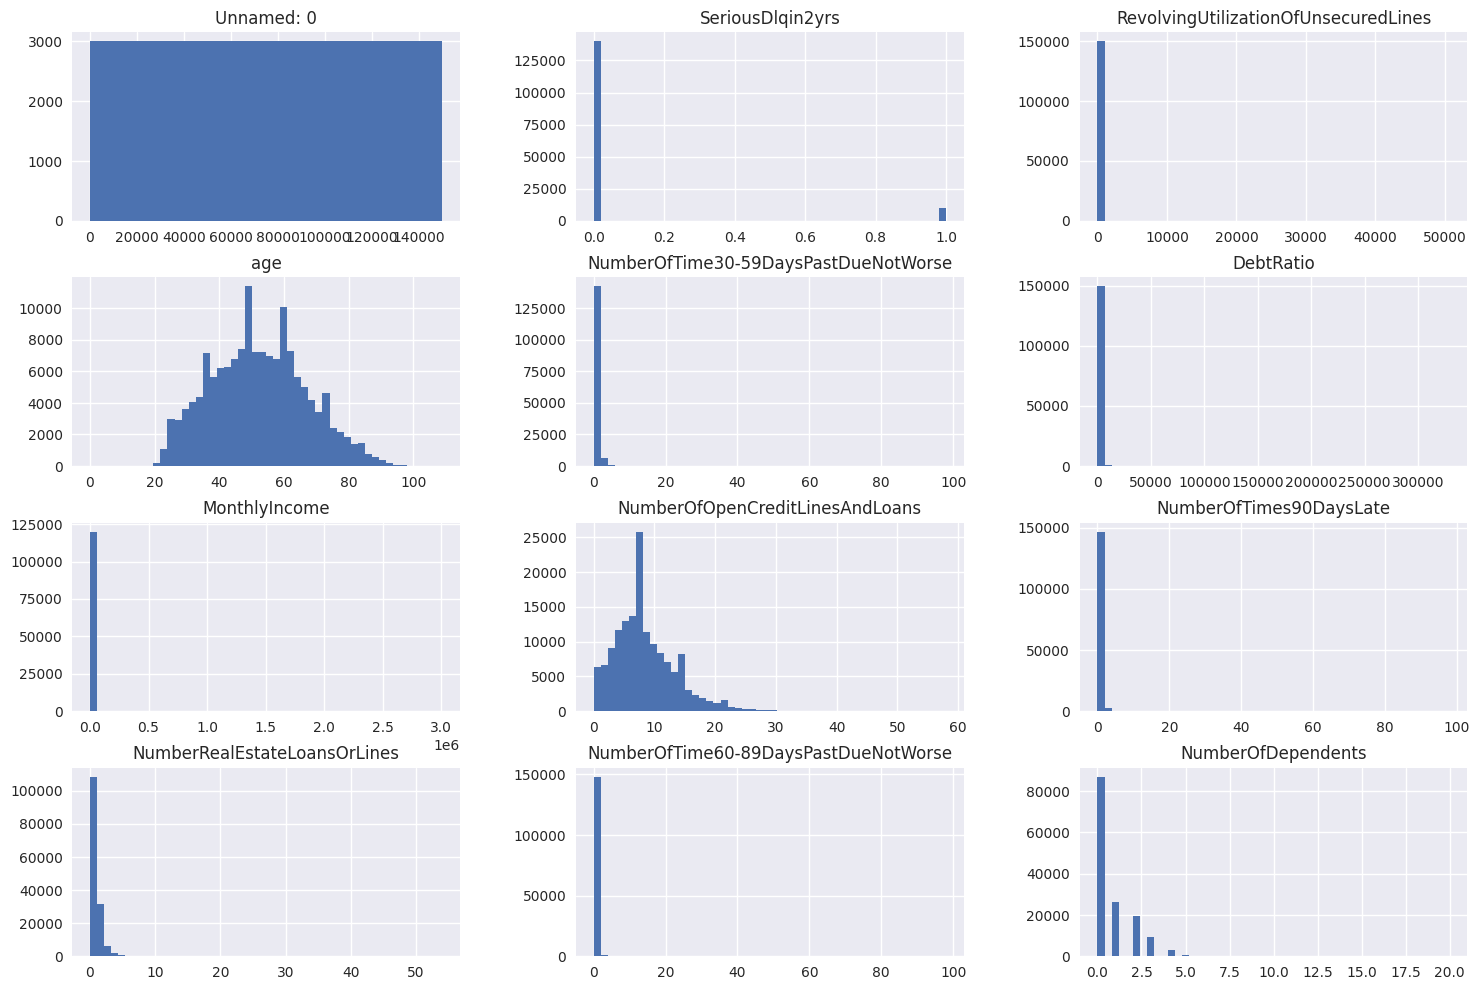

In [9]:
train_df.hist(bins=50, figsize=(18,12))
plt.show()

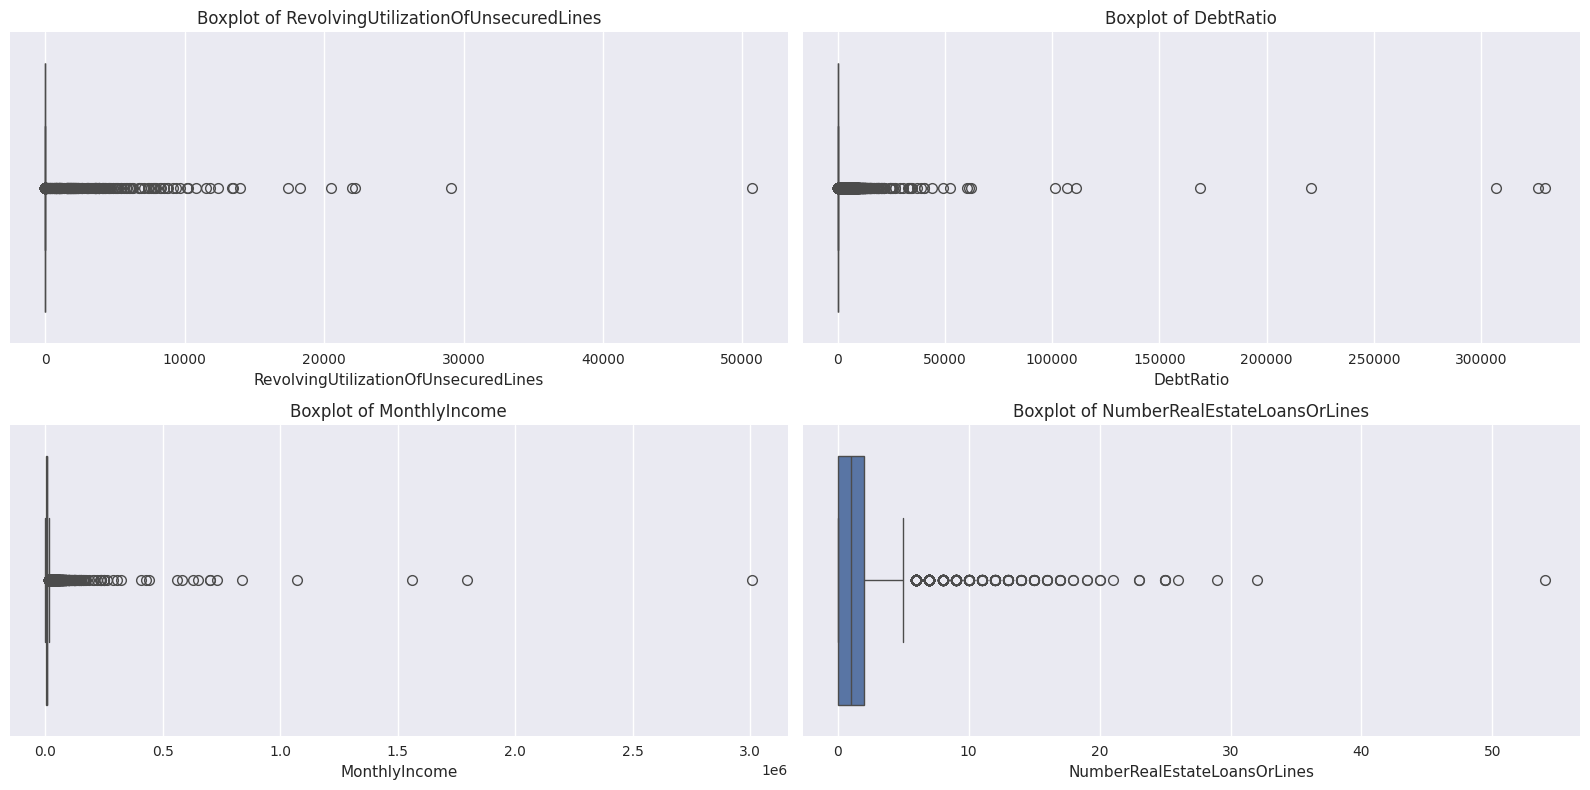

In [10]:
outliers_col = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberRealEstateLoansOrLines']
plt.figure(figsize=(16, 8)) # Set overall figure size
for i, col in enumerate(train_df[outliers_col], 1):
    plt.subplot(2, 2, i) # Create subplot in 4x3 grid
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

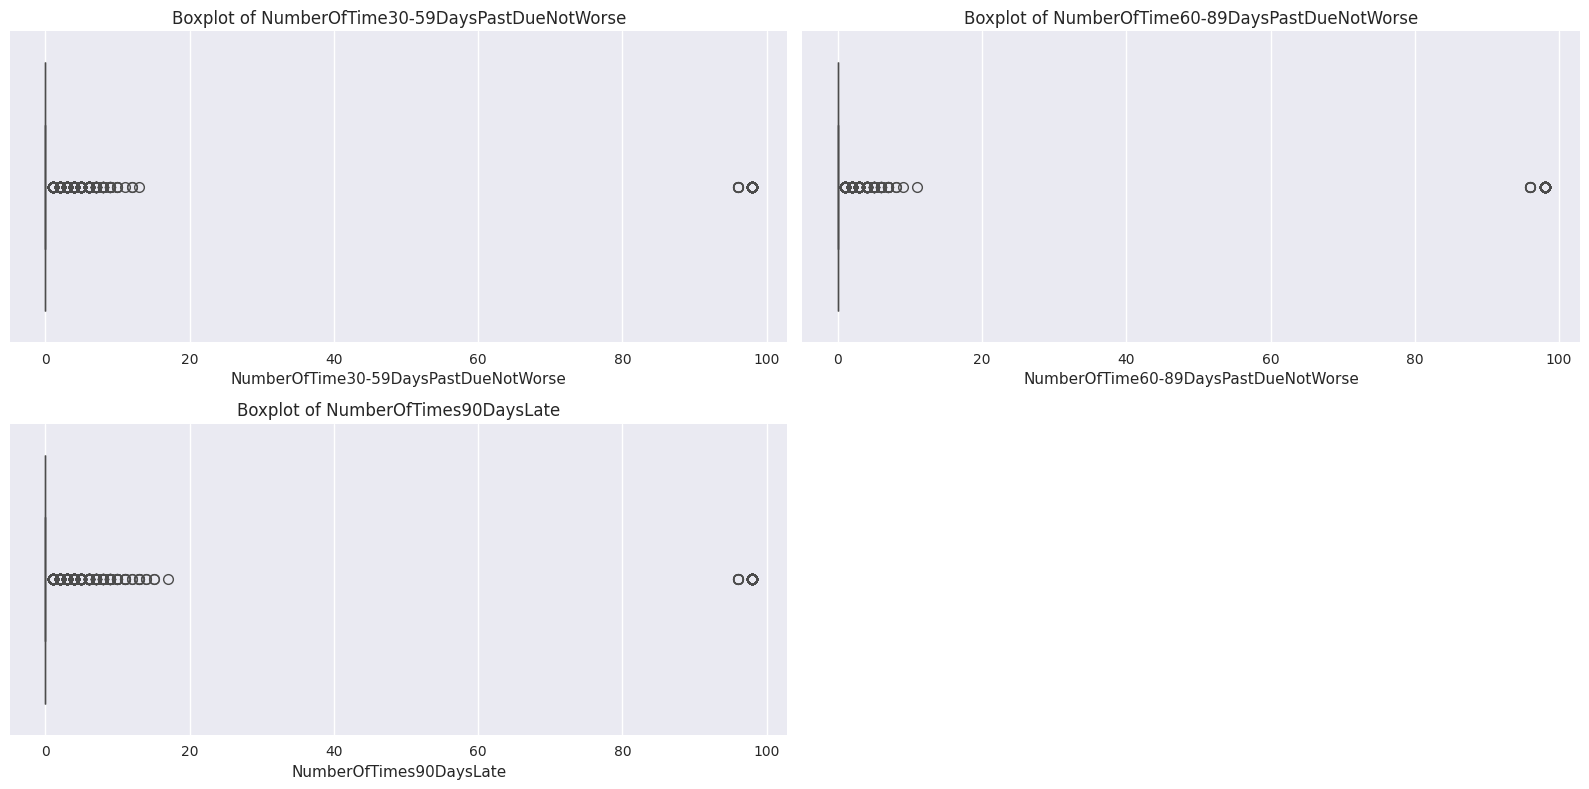

In [11]:
delay_cols = ["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]
plt.figure(figsize=(16, 8)) # Set overall figure size
for i, col in enumerate(train_df[delay_cols], 1):
    plt.subplot(2, 2, i) # Create subplot in 4x3 grid
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

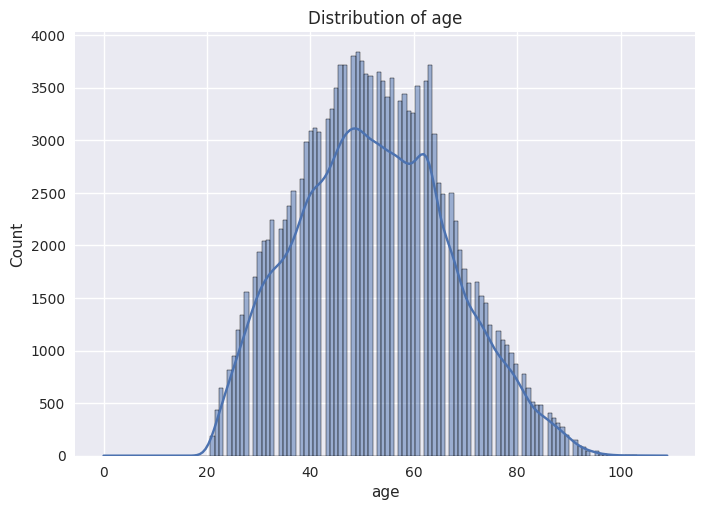

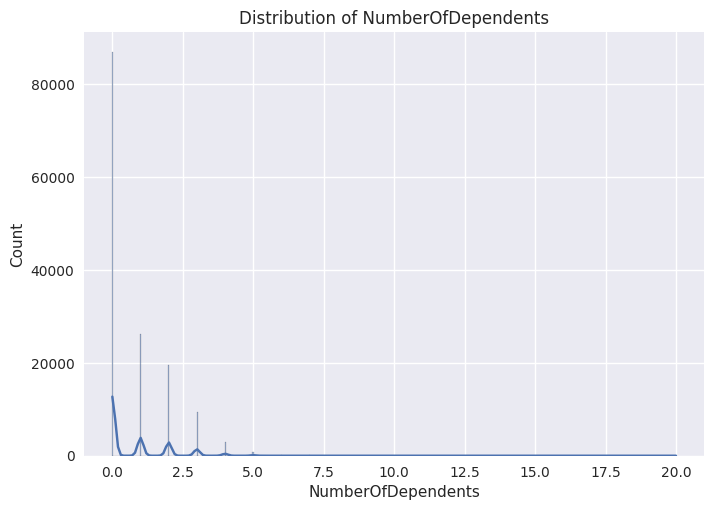

In [12]:
dist_col = ['age','NumberOfDependents']

for col in train_df[dist_col]:
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

## 4.Correlation

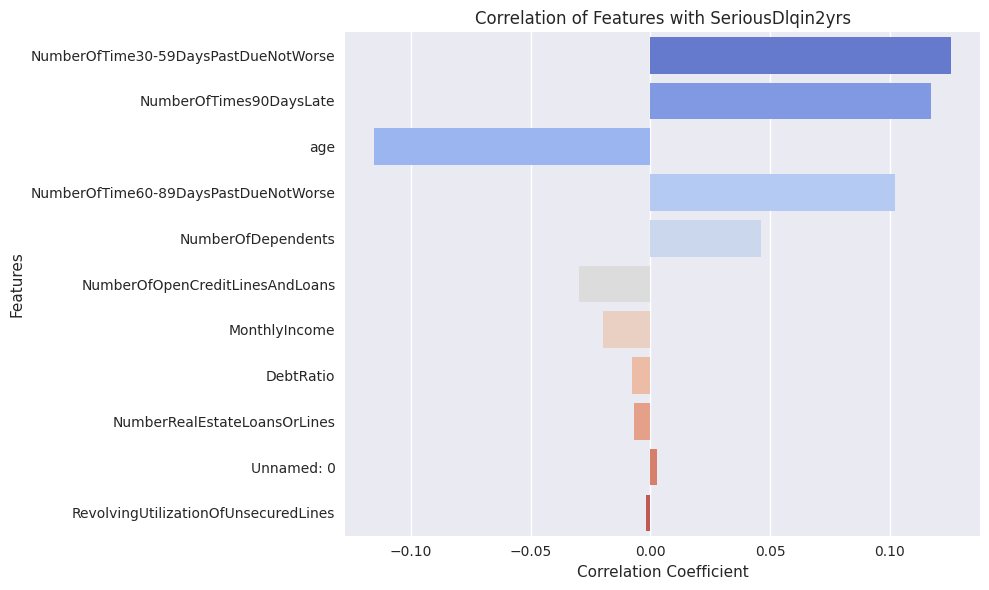

In [13]:
# Calculate correlation of each feature with SeriousDlqin2yrs
target_corr = train_df.corr()['SeriousDlqin2yrs']

# Sort correlations by absolute value (optional, for better visualization)
target_corr = target_corr.sort_values(key=abs, ascending=False).drop('SeriousDlqin2yrs')

plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.values, y=target_corr.index, palette="coolwarm")
plt.title("Correlation of Features with SeriousDlqin2yrs")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Handling Missing data & Feature engineering

1. Missing Income Data : Ages will be split to age groups, each group's median will fill the missing data of said group.
2. IQR method is used to handle the outliers in RevolvingUtilizationOfUnsecuredLines, DebtRatio, MonthlyIncome, NumberRealEstateLoansOrLines.
3. The cols NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse, NumberOfTimes90DaysLate are converted to binary to provide more meaning. As well as NumberOfDependents
4. NumberOfOpenCreditLinesAndLoans has a right-skewed distribution -> log1p is used

In [17]:
def preprocess(df):
    df = df.copy()
    age_groups = [0,25,35,45,55,65,float("inf")]
    labels = [0,1,2,3,4,5]
    # Income per age group
    df["age_group"] = pd.cut(df['age'],bins=age_groups,labels=labels,include_lowest=True)
    median_income_by_age = df.groupby('age_group')['MonthlyIncome'].median()
    df['MonthlyIncome'] = df['MonthlyIncome'].fillna(0)
    df['MonthlyIncome'] = df.apply(lambda row:  median_income_by_age[row['age_group']] if pd.isnull(row['MonthlyIncome'])else row['MonthlyIncome'],axis=1)
    print("Remaining missing values in MonthlyIncome:", df['MonthlyIncome'].isnull().sum())


    # Handling Outliers using IQR
    outliers_cols = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberRealEstateLoansOrLines']
    for col in outliers_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    
    # Converting Number columns into categories 
    df["30-59_Due"] = df["NumberOfTime30-59DaysPastDueNotWorse"].apply(lambda x:0 if x==0 else 1 if x < 5 else 2)
    df["60-89_Due"] = df["NumberOfTime60-89DaysPastDueNotWorse"].apply(lambda x:0 if x==0 else 1 if x < 5 else 2)
    df["90+_Due"] = df["NumberOfTimes90DaysLate"].apply(lambda x:0 if x==0 else 1 if x < 5 else 2)

    # Binarizing'NumberOfDependents': 0 if no dependents, 1 if one or more. Filling missing data with mode
    df['NumberOfDependents'] = df['NumberOfDependents'].apply(lambda x: 0 if x == 0 else 1)
    df['NumberOfDependents'] = df['NumberOfDependents'].fillna(value=df['NumberOfDependents'].mode()[0])
    # log1p for NumberOfOpenCreditLinesAndLoans 
    df['NumberOfOpenCreditLinesAndLoans'] = np.log1p(df['NumberOfOpenCreditLinesAndLoans'])
    # Finally dropping old columns and keeping the new ones
    df = df.drop(['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate','age'],axis=1)

    return df


In [18]:
preprocess_train_df = preprocess(train_df)
preprocess_test_df = preprocess(test_df)

Remaining missing values in MonthlyIncome: 0
Remaining missing values in MonthlyIncome: 0


In [19]:
preprocess_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype   
---  ------                                --------------   -----   
 0   Unnamed: 0                            150000 non-null  int64   
 1   SeriousDlqin2yrs                      150000 non-null  int64   
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64 
 3   DebtRatio                             150000 non-null  float64 
 4   MonthlyIncome                         150000 non-null  float64 
 5   NumberOfOpenCreditLinesAndLoans       150000 non-null  float64 
 6   NumberRealEstateLoansOrLines          150000 non-null  int64   
 7   NumberOfDependents                    150000 non-null  int64   
 8   age_group                             150000 non-null  category
 9   30-59_Due                             150000 non-null  int64   
 10  60-89_Due                             150000 non-null  i

# Models 

In [22]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split

# Models & Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# Evaluation & Metrics
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Logistic regression 

In [ ]:
cat = ['NumberRealEstateLoansOrLines','NumberOfDependents','age_group','30-59_Due','60-89_Due','90+_Due']
num = ['RevolvingUtilizationOfUnsecuredLines','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans']

cat_encoder = OneHotEncoder()
scaler = StandardScaler()

logistic= LogisticRegression(class_weight="balanced",random_state=45)

col_transformer = make_column_transformer((cat_encoder,cat),(scaler,num),remainder="passthrough")

pipeline_lg = Pipeline([('col',col_transformer),('clf',logistic)])


In [25]:
Y = preprocess_train_df['SeriousDlqin2yrs']
X = preprocess_train_df.drop(['SeriousDlqin2yrs'],axis=1)

In [26]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y, test_size = 0.2, random_state=45)

In [28]:
logistic_model = pipeline_lg.fit(X_train,Y_train)

In [29]:
predict_val = logistic_model.predict(X_val)

In [35]:
precision_logistic = precision_score(Y_val,predict_val)
print(f"Precision : {precision_logistic:.04f}")

recall_logistic = recall_score(Y_val,predict_val)
print(f"Recall : {recall_logistic:.04f}")

f1_logistic = f1_score(Y_val,predict_val)
print(f"F1 : {f1_logistic:.4f}")

Precision : 0.2082
Recall : 0.7406
F1 : 0.3250


# Random Forest 

In [38]:
rfc = RandomForestClassifier(class_weight='balanced', n_estimators=200, max_depth=5, min_samples_leaf = 2,random_state=45)
pipeline_rfc = Pipeline([('col',col_transformer),('clf',rfc)])

In [39]:
RFC_model = pipeline_rfc.fit(X_train,Y_train)

In [40]:
pred_val_rfc = RFC_model.predict(X_val)

In [41]:
precision_rfc = precision_score(Y_val,pred_val_rfc)
print(f"Precision : {precision_rfc:.04f}")

recall_rfc = recall_score(Y_val,pred_val_rfc)
print(f"Recall : {recall_rfc:.04f}")

f1_rfc = f1_score(Y_val,pred_val_rfc)
print(f"F1 : {f1_rfc:.4f}")

Precision : 0.2225
Recall : 0.6993
F1 : 0.3376


## Threshholds fine-tuning

In [ ]:
threshold